# 71 人間関係ネットワークの可視化

In [1]:
import pandas as pd
# リピーター20人のSNSでのつながり
df_links = pd.read_csv("links.csv")
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

NUM = len(df_links.index)
for i in range(1, NUM+1):
    node_no = df_links.columns[i].strip("Node")
    G.add_node(str(node_no))

for i in range(NUM):
    for j in range(NUM):
        node_name = "Node" + str(j)
        if df_links[node_name].iloc[i]==1:
            G.add_edge(str(i),str(j))
nx.draw_networkx(G, node_color="k", edge_color="k", font_color="w")
plt.show()

<Figure size 640x480 with 1 Axes>

# 72 口コミによる情報伝播の様子

In [3]:
import numpy as np

def determine_link(percent):
    rand_val = np.random.rand()
    if rand_val <= percent:
        return 1
    else:
        return 0

def simulate_percolation(num, list_active, percent_percolation):
    for i in range(num):
        # 口コミを知っている人が友人に伝達する
        if list_active[i] == 1:
            for j in range(num):
                node_name = "Node" + str(j)
                if df_links[node_name].iloc[i]==1:
                    # 与えられた確率によって伝播する
                    if determine_link(percent_percolation)==1:
                        list_active[j] = 1
    return list_active
            
percent_percolation = 0.1
T_NUM = 100
NUM = len(df_links.index)
# 人に伝わったかを判別したリスト
list_active = np.zeros(NUM)
# 初期値はnode_0一人が情報を知っている
list_active[0] = 1
list_timeSeries = []
# シミュレーションを100回繰り返す
for t in range(T_NUM):
    list_active = simulate_percolation(NUM, list_active, percent_percolation)
    #シミュレーション1回ごとに伝播の広がりを記録
    list_timeSeries.append(list_active.copy())


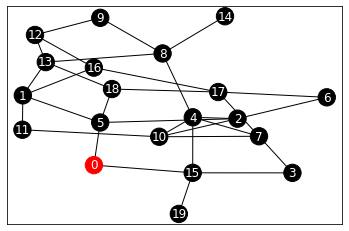

In [4]:
def active_node_coloring(list_active):
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append("r")
        else:
            list_color.append("k")
    return list_color

t = 0
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

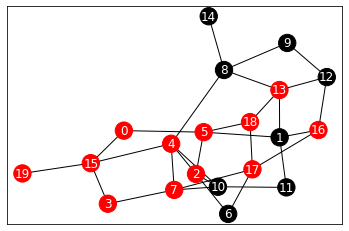

In [5]:
t = 10
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

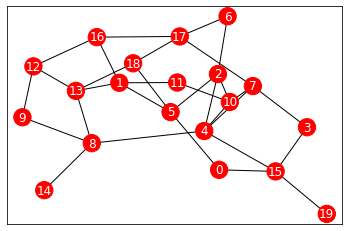

In [6]:
t = 99
nx.draw_networkx(G, font_color="w", node_color=active_node_coloring(list_timeSeries[t]))
plt.show()